# Decision Tree Lab

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split

## 1 Debug and Eval

### 1.1 (5%) Debug 

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8') 

Expected Accuracy = [1.0]


In [10]:
#Debug
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])

irisDataFrame['class'] = irisDataFrame['class'].str.decode('utf-8') 

# encode the targets to be 0, 1, 2
irisLabelsEncoded = irisDataFrame.apply(LabelEncoder().fit_transform)

# define the features
X = irisLabelsEncoded[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
# define the target
y = irisLabelsEncoded['class']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

clf = DecisionTreeClassifier()

# train model
clf.fit(X_train, y_train)

# output model info
print('training score: ', clf.score(X_train, y_train))
print('test score', clf.score(X_test, y_test))



training score:  1.0
test score 1.0


**Discussion:**  
Using the default parameters of DecisionTreeClassifier, I got a training and test score of 1.0 as expected.

### 1.2 (5%) Evaluation 

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [18]:
# Evaluation
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])

irisDataFrame['class'] = irisDataFrame['class'].str.decode('utf-8') 

# encode the targets to be 0, 1, 2
irisLabelsEncoded = irisDataFrame.apply(LabelEncoder().fit_transform)

# define the features
X = irisLabelsEncoded[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
# define the target
y = irisLabelsEncoded['class']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

clf = DecisionTreeClassifier(max_depth=3)

# train model
clf.fit(X_train, y_train)

# output model info
print('training score: ', clf.score(X_train, y_train))
print('test score', clf.score(X_test, y_test))

training score:  0.9833333333333333
test score 0.9333333333333333


**Discussion:**  
Setting max_depth = 3 and a training/test split of 80/20, the DecisionTreeClassifier found a training accuracy of 98.333% and a test score of 93.333%.  

These accuracies make sense and are what I had expected. Previously, not restricting the max_depth I found an accuracy of 100% but now that max_depth is restricted, natrually, the Decision Tree's ability to fit the data was slightly reduced, resulting in a lower accuracy. Further, limiting the max_depth is beneficial because it can reduce overfitting of the training data. Limiting the max_depth is a method used to reduce the complexity of the decision tree, avoiding overfit, but also potentially reducing overall accuracy.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [48]:
# Learn Voting with missing values.

from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
votingData = arff.loadarff('voting.arff')

# put data into a data frame
votingDataFrame = pd.DataFrame(votingData[0])

votingDataFrame['Class'] = votingDataFrame['Class'].str.decode('utf-8') 

# define the features
X = votingDataFrame.drop(columns=['Class'])

# one hot encoded
X = pd.get_dummies(X)

# define the target
y = votingDataFrame['Class']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

clf = DecisionTreeClassifier()

# train model
clf.fit(X_train, y_train)

# output model info
print('training score: ', clf.score(X_train, y_train))
print('test score', clf.score(X_test, y_test))

training score:  1.0
test score 0.9770114942528736


Discussion including explaining how the missing values were handled by your model

**Discussion:**  
Above I have followed the instructions to use DecisionTreeClassifier on the voting dataset with missing values. To handle these missing values, I allowed there to be x, y, z normal values for features and an additional ? value if unknown. Then, using pd.get_dummies(), I one-hot encoded the data. This means that I made columns vote1_x_yes, vote1_x_no, vote1_x_?, where depending on the value in each row, each would have a row such as false, false, true (if the value is unknown). Then with the data one-hot encoded, I was able to train the DecisionTreeClassifier on it.  

Further, considering the results of my DecisionTreeClassifier, I got a training score of 100% and a test score of 97.7%. These values make sense because the training will always continue until all leaf nodes are pure, meaning that classification accuracy of the training set will always be 100%. Then, I found my test accuracy to be 97.7%. This is the accuracy on data that the model was not trained on, so it is expected to be slightly lower, however, it is still quite good. Also, from these accuracies, I don't think that there were any issues with overfit because it generalized quite well to the test set.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
carsData = arff.loadarff('cars.arff')

# put data into a data frame
carsDataFrame = pd.DataFrame(carsData[0])

carsDataFrame['class'] = carsDataFrame['class'].str.decode('utf-8')

# define the features
X = carsDataFrame.drop(columns=['class'])

# one hot encoded
X = pd.get_dummies(X)

# define the target
y = LabelEncoder().fit_transform(carsDataFrame['class'])

clf = DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)

# output model info
print('Scores: ', scores)
print('Average:', scores.mean())

Scores:  [0.75722543 0.79190751 0.92485549 0.67630058 0.83815029 0.92485549
 0.89595376 0.87283237 0.9127907  0.93023256]
Average: 0.8525104180669445


**10 Fold Score:**  
| Fold | Score |
| --- | --- |
| 1 | 0.75722543 |
| 2 | 0.79190751 |
| 3 | 0.92485549 |
| 4 | 0.67630058 |
| 5 | 0.83815029 |
| 6 | 0.92485549 |
| 7 | 0.89595376 |
| 8 | 0.87283237 |
| 9 | 0.9127907 |
| 10 | 0.93023256 |
| Average | 0.8525104180669445 |

**5 Fold Score:**  
| Fold | Score |
| --- | --- |
| 1 | 0.64450867 |
| 2 | 0.70809249 |
| 3 | 0.75144509 |
| 4 | 0.75362319 |
| 5 | 0.8057971 |
| Average | 0.7326933065259277 |

**Discussion:**  
Above, I have trained the DecisionTreeClassifier with n-fold cross validation where n is 5 and 10. You can see the charts describing the results above.  

With n-fold cross validation the data set is trained and scored n times, where each time 1/n of the data set is used for testing and n-1/n of the dataset is used for training. This method is beneficial because it ensures that ALL data is trained on, and averaging the results from all 10 tests will provide a decent approximation of what the real accuracy is. (Though normally you would do a final training with ALL data to create your final model).  

Viewing these results, they are not what I had expected, but they make sense. First, comparing 5 fold CV to 10 fold CV you see that the average accuracy of 10 fold CV is higher than 5 fold. I think that this is because with 10 fold, each training fold sees a much larger portion of the data, allowing it to better learn the data, where on the other hand the 5 fold is shown a smaller portion of the data so it doesn't have as much to learn from. Further, because 10 fold is run more times, the results are more consistent becaues it was run 10 times. However, on the other hand, 5 fold CV is only run 5 times allowing for more variation in the results. 


### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered). 
- Compare your thoughts on important features with the attribute feature_importances_

[Text(0.46, 0.9545454545454546, 'x[11] <= 0.5\ngini = 0.474\nsamples = 435\nvalue = [267, 168]'),
 Text(0.24, 0.8636363636363636, 'x[6] <= 0.5\ngini = 0.038\nsamples = 258\nvalue = [253, 5]'),
 Text(0.35, 0.9090909090909092, 'True  '),
 Text(0.16, 0.7727272727272727, 'x[8] <= 0.5\ngini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'),
 Text(0.12, 0.6818181818181818, 'x[33] <= 0.5\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(0.08, 0.5909090909090909, 'x[16] <= 0.5\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.04, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.12, 0.5, 'x[43] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.08, 0.4090909090909091, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.16, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.6818181818181818, 'gini = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(0.32, 0.7727272727272727,

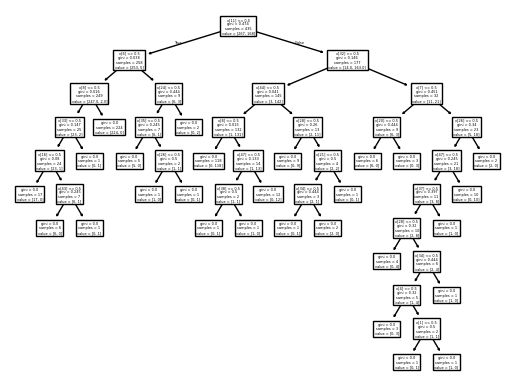

In [70]:
# Print induced trees for the voting dataset

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
votingData = arff.loadarff('voting.arff')

# put data into a data frame
votingDataFrame = pd.DataFrame(votingData[0])

votingDataFrame['Class'] = votingDataFrame['Class'].str.decode('utf-8') 

# define the features
X = votingDataFrame.drop(columns=['Class'])

# one hot encoded
X = pd.get_dummies(X)

# define the target
y = votingDataFrame['Class']

clf = DecisionTreeClassifier()

# train model
clf.fit(X, y)

tree.plot_tree(clf)

print(clf.feature_importances_)

[Text(0.77234375, 0.9666666666666667, 'x[12] <= 0.5\ngini = 0.457\nsamples = 1728\nvalue = [384, 69, 1210, 65]'),
 Text(0.76234375, 0.9, 'x[19] <= 0.5\ngini = 0.579\nsamples = 1152\nvalue = [384, 69, 634, 65]'),
 Text(0.76734375, 0.9333333333333333, 'True  '),
 Text(0.75234375, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.629\nsamples = 768\nvalue = [384, 69, 250, 65]'),
 Text(0.6096875, 0.7666666666666667, 'x[0] <= 0.5\ngini = 0.629\nsamples = 576\nvalue = [312, 69, 130, 65]'),
 Text(0.449375, 0.7, 'x[5] <= 0.5\ngini = 0.642\nsamples = 384\nvalue = [204, 69, 46, 65]'),
 Text(0.25875, 0.6333333333333333, 'x[6] <= 0.5\ngini = 0.546\nsamples = 288\nvalue = [184, 23, 42, 39]'),
 Text(0.135, 0.5666666666666667, 'x[17] <= 0.5\ngini = 0.417\nsamples = 192\nvalue = [141, 0, 38, 13]'),
 Text(0.08, 0.5, 'x[1] <= 0.5\ngini = 0.299\nsamples = 128\nvalue = [106, 0, 9, 13]'),
 Text(0.05, 0.43333333333333335, 'x[18] <= 0.5\ngini = 0.17\nsamples = 64\nvalue = [58, 0, 6, 0]'),
 Text(0.04, 0.366666666666

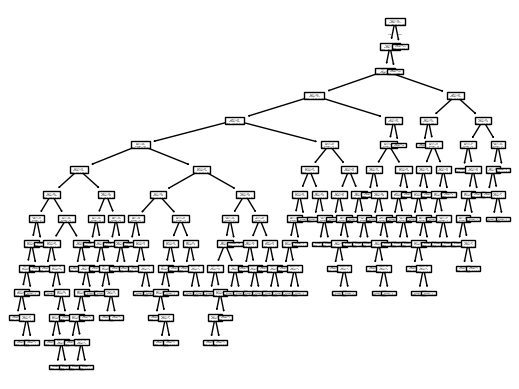

In [71]:
# Printing tree with cars

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
carsData = arff.loadarff('cars.arff')

# put data into a data frame
carsDataFrame = pd.DataFrame(carsData[0])

carsDataFrame['class'] = carsDataFrame['class'].str.decode('utf-8')

# define the features
X = carsDataFrame.drop(columns=['class'])

# one hot encoded
X = pd.get_dummies(X)

# define the target
y = LabelEncoder().fit_transform(carsDataFrame['class'])

clf = DecisionTreeClassifier()

# train model
clf.fit(X, y)

tree.plot_tree(clf)

print(clf.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.01033041 0.         0.         0.         0.         0.95892023
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03074936 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


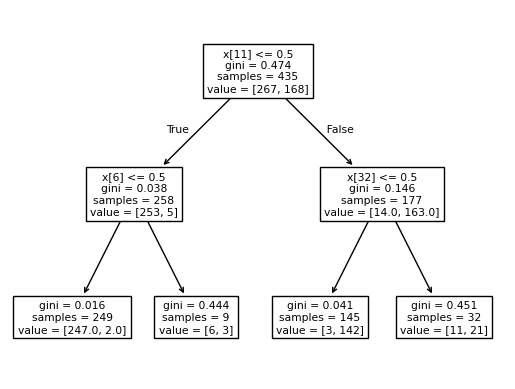

In [76]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
votingData = arff.loadarff('voting.arff')

# put data into a data frame
votingDataFrame = pd.DataFrame(votingData[0])

votingDataFrame['Class'] = votingDataFrame['Class'].str.decode('utf-8') 

# define the features
X = votingDataFrame.drop(columns=['Class'])

# one hot encoded
X = pd.get_dummies(X)

# define the target
y = votingDataFrame['Class']

clf = DecisionTreeClassifier(max_depth=2)

# train model
clf.fit(X, y)

tree.plot_tree(clf)

print(clf.feature_importances_)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.
 0.  0.6 0. ]


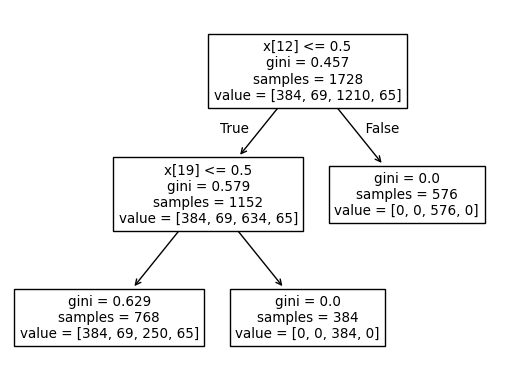

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

# get data
carsData = arff.loadarff('cars.arff')

# put data into a data frame
carsDataFrame = pd.DataFrame(carsData[0])

carsDataFrame['class'] = carsDataFrame['class'].str.decode('utf-8')

# define the features
X = carsDataFrame.drop(columns=['class'])

# one hot encoded
X = pd.get_dummies(X)

# define the target
y = LabelEncoder().fit_transform(carsDataFrame['class'])

clf = DecisionTreeClassifier(max_depth=2)

# train model
clf.fit(X, y)

tree.plot_tree(clf)

print(clf.feature_importances_)

Discuss what the Trees have learned on the 2 data sets

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [ ]:
# Experiment with criterion parameter

Discuss criterion effects

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%) 
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [2]:
# Explore different overfit parameters

Discussion

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [ ]:
# Pruning

Discussion

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [ ]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

Discussion

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner 
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly. 
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

Discussion

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset = 
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets 
        """
        return 0

In [ ]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])